In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [81]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

APPLE VISION PRO

In [139]:
def text_analysis(corpus):
  corpus_data = pd.read_csv(corpus, delimiter="\t")
  corpus_comments = corpus_data['comments']
  corpus_comments_strings = str(corpus_comments)
  corpus_tokens = nltk.tokenize.word_tokenize(corpus_comments_strings)
  corpus_comments_clean = [ps.stem(word) for word in corpus_tokens if word.isalpha() if not word in set(stopwords.words('english'))]
  freq_dist = nltk.FreqDist(corpus_comments_clean)
  freq_dist.plot(40, cumulative=True)
  corpus_text = nltk.Text(corpus_comments_strings)
  print('\n')
  freq_dist.tabulate(10)
  print(f'\n Amount of Words: {len(corpus_tokens)}')
  print(f'\n Vocabulary: {sorted(set(corpus_tokens))}')
  print(f'\n Vocabulary Size: {len(set(corpus_tokens))}')
  print('\n')
  print(f'\n Amount of Words in Clean Corpus: {len(corpus_comments_clean)}')
  print(f'\n Vocabulary Clean Corpus: {sorted(set(corpus_comments_clean))}')
  print(f'\n Vocabulary Size of Clean Corpus: {len(set(corpus_comments_clean))}')
  #print(corpus_comments_clean[:-2])
  wordcloud = WordCloud(width = 1400,
                      height = 800,
                      background_color='white',
                      stopwords = stop_words,
                      min_font_size = 12,
                      random_state=1,
                      collocations=True,
                      colormap='cool').generate(' '.join(corpus_tokens))
  plt.figure(figsize = (10, 6), facecolor = 'k')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.savefig(f'wordcloud {corpus}.png', format='png', dpi=150, bbox_inches='tight')
  plt.axis('off')
  plt.show()

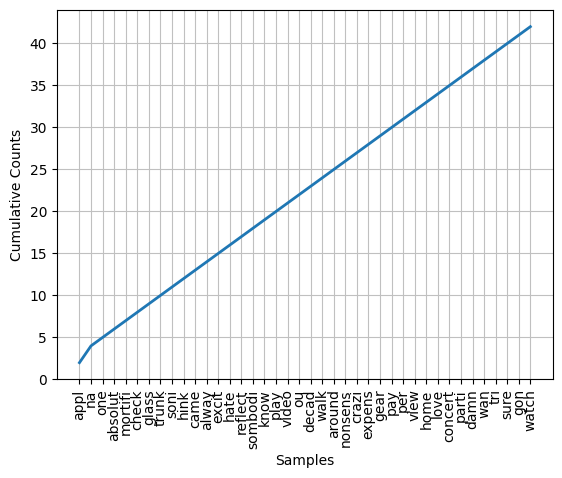



   appl      na     one absolut mortifi   check   glass   trunk    soni    hink 
      2       2       1       1       1       1       1       1       1       1 

 Amount of Words: 125

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'about', 'absolutely', 'after', 'all', 'always', 'am', 'and', 'apple', 'around', 'at', 'be', 'breakdo', 'came', 'can', 'check', 'comments', 'concert', 'couple', 'crazy', 'damn', 'days', 'decade', 'does', 'dtype', 'exciting', 'expensive', 'for', 'from', 'gear', 'glass', 'gon', 'hate', 'hink', 'holones', 'home', 'i', 'in', 'is', 'it', 'its', 'know', 'll', 'love', 'microssoft', 'mine', 'mortified', 'na', 'new', 'nonsense', 'object', 'of', 'on', 'one', 'only', 'ou', 'parties', 'pay', 'per', 'play', 'pri', 'reflect', 'returned', 'risky', 's', 'sombody', 'sony', 'sure', 'that', 'the', 'this', 'to', 'trunk', 'try', 'uhhh', 'video', 'view', 'walking', 'wan', 'watch', 'we', 'who', 'why', 'wi

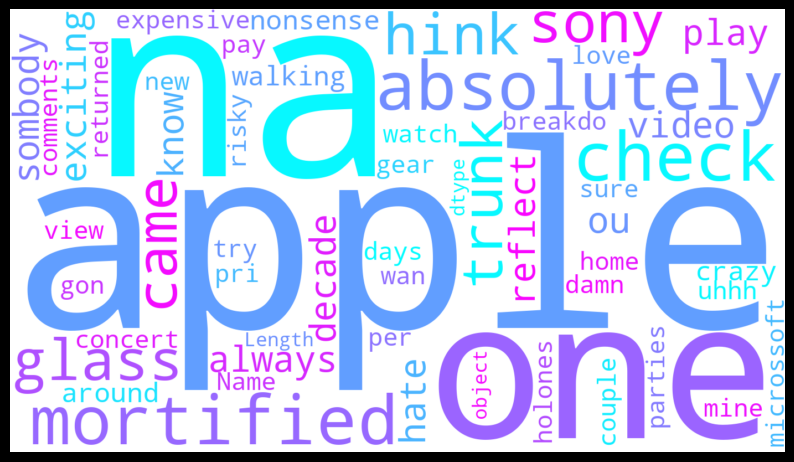

In [140]:
text_analysis('apple_vision_pro_one_comments.txt')

In [163]:
def likes(text,amount,direction):
  data = pd.read_csv(text)
  data_frame = pd.DataFrame(data)
  by_likes = data_frame.loc[:, ['amount_of_likes', 'comment']].sort_values(by='amount_of_likes', ascending=direction, ignore_index=True)[:amount]
  return by_likes

In [164]:
likes('apple_vision_pro_one.txt', 10, False)

,amount_of_likes,comment
0,2,craaaaaaaaaaap
1,2,craaaaaaaaaaap
2,2,craaaaaaaaaaap
3,2,craaaaaaaaaaap
4,1,im out...why should anyone pay to facetime a p...
5,1,We will all be wearing advanced versions of th...
6,1,Ok we can all agree that this is stupid 😂
7,1,This nonsense crazy expensive gear from Apple ...
8,1,We will all be wearing advanced versions of th...
9,1,We will all be wearing advanced versions of th...


META QUEST

PSVR